# **Tugas Besar IF2120 Probabilitas dan Statistika 2025/2026**

### Topik : **Utility**


K01 & K02 - Kelompok 42

Link video : https://drive.google.com/file/d/16gVhLDPEDtba9cVm0PeXXGdMY25dl8IQ/view?usp=sharing

Anggota Kelompok :
1. Tengku Naufal Saqib - 13524012
2. Fayyaz Akmal Lauda - 13524076

## Inisialisasi Dependencies dan Load Data

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import t, f


Load Data

In [ ]:
import gdown

# Ambil file_id dari link gdrive dataset
# https://drive.google.com/file/d/1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM/view?usp=sharing -> file_id = 1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM

# Kemudian, masukan file_id dengan template url berikut
# https://drive.google.com/uc?id={file_id}

url = "https://drive.google.com/uc?id=1zSiDDKUU3Yw_f8GzPLJLEdHDWX38wcFf"

output = "utility.csv"
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)
data.info()

Downloading...
From: https://drive.google.com/uc?id=1zSiDDKUU3Yw_f8GzPLJLEdHDWX38wcFf
To: /content/utility.csv
100%|██████████| 336k/336k [00:00<00:00, 8.95MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   billing_month             5000 non-null   int64  
 1   season                    5000 non-null   object 
 2   avg_temperature_c         5000 non-null   float64
 3   household_size            5000 non-null   int64  
 4   working_days              5000 non-null   float64
 5   ownership_status          5000 non-null   object 
 6   water_liter               5000 non-null   float64
 7   electricity_kwh           5000 non-null   float64
 8   gas_m3                    5000 non-null   float64
 9   energy_efficiency_rating  5000 non-null   object 
 10  water_rate                5000 non-null   float64
 11  electricity_rate          5000 non-null   float64
 12  gas_rate                  5000 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 507.9+ KB


# Soal General

## Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data.
- Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.
- Data yang bersifat kategorikal dapat dicari unique values, dan proporsi nya.

### Implementasi Fungsi Buatan Sendiri

Data Numerik

In [ ]:
kolom_numerik = data.select_dtypes(include="number").columns.tolist()
print("Kolom numerik: ", kolom_numerik)

# FUNGSI STATISTIK
def mean(x):
  return sum(x)/len(x)

def median(x):
  x_urut = sorted(x)
  n = len(x_urut)
  tengah = n // 2
  if n % 2 == 0:
    return (x_urut[tengah - 1] + x_urut[tengah]) / 2
  else:
    return x_urut[tengah]

def modus(x):
  frekuensi = {}
  for nilai in x:
    frekuensi[nilai] = frekuensi.get(nilai, 0) + 1
  frek_maks = max(frekuensi.values())
  daftar_modus = [k for k, v in frekuensi.items() if v == frek_maks]
  return daftar_modus[0]

def variansi(x):
  rataan = mean(x)
  return sum((xi - rataan) ** 2 for xi in x) / (len(x) - 1)

def standar_deviasi(x):
  return math.sqrt(variansi(x))

def jangkauan(x):
  return max(x) - min(x)

def kuartil(x, q):
  """
  q antara 0 dan 1
  q = 0,25 untuk Q1
  q = 0,5 untuk Q2 (median)
  q = 0,75 untuk Q3
  """
  x_urut = sorted(x)
  n = len(x_urut)
  if n == 1:
    return x_urut[0]

  posisi = q * (n - 1)
  indeks_bawah = int(math.floor(posisi))
  indeks_atas = int(math.ceil(posisi))

  if indeks_bawah == indeks_atas:
    return x_urut[indeks_bawah]

  bobot = posisi - indeks_bawah
  return x_urut[indeks_bawah] * (1 - bobot) + x_urut[indeks_atas] * bobot

def iqr(x):
  return kuartil(x, 0.75) - kuartil(x, 0.25)

def skewness(x):
  n = len(x)
  m = mean(x)
  s = standar_deviasi(x)
  if s == 0:
    return 0.0

  m3 = sum((xi - m) ** 3 for xi in x) / n
  return m3 / (s ** 3)

def kurtosis(x):
  n = len(x)
  m = mean(x)
  s = standar_deviasi(x)
  if s == 0:
    return 0.0

  m4 = sum((xi - m) ** 4 for xi in x) / n
  return m4 / (s ** 4) - 3


# HITUNG STATISTIK
hasil_statistik_numerik = {}

for kolom in kolom_numerik:
  nilai = data[kolom].dropna().tolist()
  if len(nilai) < 2:
    continue

  hasil_statistik_numerik[kolom] = {
        "Mean": mean(nilai),
        "Median": median(nilai),
        "Modus": modus(nilai),
        "Standar Deviasi": standar_deviasi(nilai),
        "Variansi": variansi(nilai),
        "Jangkauan": jangkauan(nilai),
        "Nilai Minimum": min(nilai),
        "Nilai Maksimum": max(nilai),
        "Q1": kuartil(nilai, 0.25),
        "Q2 (Median)": kuartil(nilai, 0.5),
        "Q3": kuartil(nilai, 0.75),
        "IQR": iqr(nilai),
        "Skewness": skewness(nilai),
        "Kurtosis": kurtosis(nilai)
  }

tabel_statistik_numerik = pd.DataFrame(hasil_statistik_numerik).T
tabel_statistik_numerik

Kolom numerik:  ['billing_month', 'avg_temperature_c', 'household_size', 'working_days', 'water_liter', 'electricity_kwh', 'gas_m3', 'water_rate', 'electricity_rate', 'gas_rate']


,Mean,Median,Modus,Standar Deviasi,Variansi,Jangkauan,Nilai Minimum,Nilai Maksimum,Q1,Q2 (Median),Q3,IQR,Skewness,Kurtosis
billing_month,5.881600,6.0000,12.0000,3.978184,1.582595e+01,11.000,1.000,12.000,2.0000,6.0000,8.0000,6.0000,0.216128,-1.254363
avg_temperature_c,17.438220,12.2000,10.2000,9.164176,8.398213e+01,32.400,3.000,35.400,9.6000,12.2000,27.4000,17.8000,0.322148,-1.663598
household_size,3.486800,3.0000,3.0000,1.705523,2.908808e+00,5.000,1.000,6.000,2.0000,3.0000,5.0000,3.0000,0.019405,-1.270859
working_days,23.870200,24.0000,24.0000,2.778506,7.720096e+00,14.000,14.000,28.000,22.0000,24.0000,26.0000,4.0000,-0.379948,-0.404582
water_liter,10952.421480,10593.9500,16596.0000,5500.878405,3.025966e+07,25131.200,2174.600,27305.800,6334.4000,10593.9500,15472.9500,9138.5500,0.147173,-1.049211
electricity_kwh,568.707150,525.2150,317.5100,328.524236,1.079282e+05,1959.390,45.730,2005.120,298.6100,525.2150,786.4300,487.8200,0.639813,-0.112944
gas_m3,108.658554,93.3900,42.3000,67.455476,4.550241e+03,311.540,8.490,320.030,50.1075,93.3900,149.9425,99.8350,0.680716,-0.490588
water_rate,0.001503,0.0015,0.0012,0.000295,8.689103e-08,0.001,0.001,0.002,0.0012,0.0015,0.0018,0.0006,-0.000390,-1.178154
electricity_rate,0.160482,0.1600,0.1300,0.023595,5.567390e-04,0.080,0.120,0.200,0.1400,0.1600,0.1800,0.0400,-0.013946,-1.161459
gas_rate,0.074664,0.0700,0.0600,0.014923,2.226916e-04,0.050,0.050,0.100,0.0600,0.0700,0.0900,0.0300,0.035408,-1.041758


Data Kategorikal

In [ ]:
kolom_kategorikal = [kolom for kolom in data.columns if kolom not in kolom_numerik]
print("Kolom kategorikal: ", kolom_kategorikal)

def tabel_frekuensi(x):
  frekuensi = {}
  for nilai in x:
    frekuensi[nilai] = frekuensi.get(nilai, 0) + 1

  total = len(x)
  hasil = []

  for kategori, jumlah in frekuensi.items():
    proporsi = jumlah / total
    hasil.append((kategori, jumlah, proporsi, proporsi * 100))

  df_frekuensi = pd.DataFrame(hasil, columns = ["Kategori", "Frekuensi", "Proporsi", "Persentase"])
  df_frekuensi = df_frekuensi.sort_values(by="Frekuensi", ascending = False).reset_index(drop = True)
  return df_frekuensi

hasil_kategorikal = {}

for kolom in kolom_kategorikal:
  print(f"\n-- Kolom: {kolom} --")
  seri = data[kolom].dropna()
  tabel = tabel_frekuensi(seri)
  hasil_kategorikal[kolom] = tabel
  display(tabel)


Kolom kategorikal:  ['season', 'ownership_status', 'energy_efficiency_rating']

-- Kolom: season --


,Kategori,Frekuensi,Proporsi,Persentase
0,Winter,2935,0.587,58.7
1,Summer,2065,0.413,41.3



-- Kolom: ownership_status --


,Kategori,Frekuensi,Proporsi,Persentase
0,Rented,3465,0.693,69.3
1,Owned,1535,0.307,30.7



-- Kolom: energy_efficiency_rating --


,Kategori,Frekuensi,Proporsi,Persentase
0,B,1795,0.3590,35.90
1,A,1060,0.2120,21.20
2,C,1020,0.2040,20.40
3,D,873,0.1746,17.46
4,E,252,0.0504,5.04


### Implementasi Menggunakan Library

#### Data Numerik

In [ ]:
hasil_statistik_library = {}

for kolom in kolom_numerik:
    seri = data[kolom].dropna()
    if len(seri) < 2:
        continue

    hasil_statistik_library[kolom] = {
        "Mean": seri.mean(),
        "Median": seri.median(),
        "Modus": seri.mode().iloc[0] if not seri.mode().empty else np.nan,
        "Standar Deviasi": seri.std(ddof=1),
        "Variansi": seri.var(ddof=1),
        "Rentang": seri.max() - seri.min(),
        "Minimum": seri.min(),
        "Maksimum": seri.max(),
        "Q1": seri.quantile(0.25),
        "Q2 (Median)": seri.quantile(0.5),
        "Q3": seri.quantile(0.75),
        "IQR": seri.quantile(0.75) - seri.quantile(0.25),
        "Skewness": seri.skew(),
        "Kurtosis": seri.kurtosis()
    }

tabel_statistik_library = pd.DataFrame(hasil_statistik_library).T
tabel_statistik_library

,Mean,Median,Modus,Standar Deviasi,Variansi,Rentang,Minimum,Maksimum,Q1,Q2 (Median),Q3,IQR,Skewness,Kurtosis
billing_month,5.881600,6.0000,12.0000,3.978184,1.582595e+01,11.000,1.000,12.000,2.0000,6.0000,8.0000,6.0000,0.216258,-1.253718
avg_temperature_c,17.438220,12.2000,10.2000,9.164176,8.398213e+01,32.400,3.000,35.400,9.6000,12.2000,27.4000,17.8000,0.322341,-1.663527
household_size,3.486800,3.0000,3.0000,1.705523,2.908808e+00,5.000,1.000,6.000,2.0000,3.0000,5.0000,3.0000,0.019416,-1.270237
working_days,23.870200,24.0000,24.0000,2.778506,7.720096e+00,14.000,14.000,28.000,22.0000,24.0000,26.0000,4.0000,-0.380176,-0.402747
water_liter,10952.421480,10593.9500,2814.9000,5500.878405,3.025966e+07,25131.200,2174.600,27305.800,6334.4000,10593.9500,15472.9500,9138.5500,0.147261,-1.048279
electricity_kwh,568.707150,525.2150,134.3600,328.524236,1.079282e+05,1959.390,45.730,2005.120,298.6100,525.2150,786.4300,487.8200,0.640197,-0.110700
gas_m3,108.658554,93.3900,42.3000,67.455476,4.550241e+03,311.540,8.490,320.030,50.1075,93.3900,149.9425,99.8350,0.681125,-0.488873
water_rate,0.001503,0.0015,0.0012,0.000295,8.689103e-08,0.001,0.001,0.002,0.0012,0.0015,0.0018,0.0006,-0.000390,-1.177402
electricity_rate,0.160482,0.1600,0.1300,0.023595,5.567390e-04,0.080,0.120,0.200,0.1400,0.1600,0.1800,0.0400,-0.013954,-1.160684
gas_rate,0.074664,0.0700,0.0600,0.014923,2.226916e-04,0.050,0.050,0.100,0.0600,0.0700,0.0900,0.0300,0.035429,-1.040815


#### Data Kategorikal

In [ ]:
hasil_kategorikal_library = {}

for kolom in kolom_kategorikal:
    print(f"\n-- Kolom: {kolom} --")

    frekuensi = data[kolom].value_counts(dropna=False)
    persentase = data[kolom].value_counts(dropna=False, normalize=True) * 100

    tabel = pd.DataFrame({
        "Frekuensi": frekuensi,
        "Persentase (%)": persentase
    })

    hasil_kategorikal_library[kolom] = tabel
    display(tabel)


-- Kolom: season --


,Frekuensi,Persentase (%)
season,,
Winter,2935,58.7
Summer,2065,41.3



-- Kolom: ownership_status --


,Frekuensi,Persentase (%)
ownership_status,,
Rented,3465,69.3
Owned,1535,30.7



-- Kolom: energy_efficiency_rating --


,Frekuensi,Persentase (%)
energy_efficiency_rating,,
B,1795,35.90
A,1060,21.20
C,1020,20.40
D,873,17.46
E,252,5.04


#### Perbandingan Hasil Fungsi Buatan Sendiri dengan Library

**1. Data Numerik**

  Secara umum, hasil dari fungsi buatan sendiri dan hasil dari library hampir seluruhnya bernilai sama untuk statistik berikut:
  *   Mean
  *   Median
  *   Standar deviasi
  *   Variansi
  *   Jangkauan
  *   Nilai minimum dan maksimum
  *   Kuartil (Q1, Q2, Q3)
  *   IQR
  *   Skewness
  *   Kurtosis

  Perbedaan yang muncul hanya terjadi pada beberapa angka desimal yang sangat kecil dan tidak signifikan.

  Terdapat perbedaan pada nilai modus di beberapa kolom, yang terjadi karena:
  *   Fungsi buatan sendiri mengambil satu nilai pertama yang memiliki frekuensi maksimum.
  *   Sedangkan library (pandas .mode()) dapat:
      *   Mengembalikan lebih dari satu nilai modus,
      *   Atau memilih nilai minimum sebagai perwakilan jika terdapat banyak modus.

**2. Data Kategorikal**

Hasil fungsi buatan sendiri dan library pada data kategorikal sepenuhnya sama, baik dari segi:
*   Frekuensi kategori
*   Proporsi
*   Persentase

**Kesimpulan**

Hasil perhitungan statistika menggunakan fungsi buatan sendiri menghasilkan nilai yang sama atau sangat mendekati hasil library. Oleh karena itu, implementasi yang dibuat dapat dinyatakan benar dan akurat.


## Nomor 2
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

In [ ]:
def batas_outlier_iqr(data):
  q1 = kuartil(data, 0.25)
  q3 = kuartil(data,0.75)
  nilai_iqr = q3 - q1

  batas_bawah = q1 - 1.5 * nilai_iqr
  batas_atas = q3 + 1.5 * nilai_iqr

  return q1, q3, nilai_iqr, batas_bawah, batas_atas

hasil_outlier = {}

for kolom in kolom_numerik:
  nilai = data[kolom].dropna().tolist()
  q1, q3, nilai_iqr, batas_bawah, batas_atas = batas_outlier_iqr(nilai)

  outlier = [x for x in nilai if x < batas_bawah or x > batas_atas]
  hasil_outlier[kolom] = {
    "Q1": q1,
    "Q3": q3,
    "IQR": nilai_iqr,
    "Batas Bawah": batas_bawah,
    "Batas Atas": batas_atas,
    "Jumlah Outlier": len(outlier),
    "Contoh Outlier": outlier[:15]
  }

tabel_outlier = pd.DataFrame(hasil_outlier).T
tabel_outlier



,Q1,Q3,IQR,Batas Bawah,Batas Atas,Jumlah Outlier,Contoh Outlier
billing_month,2.0,8.0,6.0,-7.0,17.0,0,[]
avg_temperature_c,9.6,27.4,17.8,-17.1,54.1,0,[]
household_size,2.0,5.0,3.0,-2.5,9.5,0,[]
working_days,22.0,26.0,4.0,16.0,32.0,7,"[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0]"
water_liter,6334.4,15472.95,9138.55,-7373.425,29180.775,0,[]
electricity_kwh,298.61,786.43,487.82,-433.12,1518.16,29,"[1534.91, 1653.03, 1567.3, 1720.52, 1538.0, 16..."
gas_m3,50.1075,149.9425,99.835,-99.645,299.695,4,"[305.65, 302.23, 303.11, 320.03]"
water_rate,0.0012,0.0018,0.0006,0.0003,0.0027,0,[]
electricity_rate,0.14,0.18,0.04,0.08,0.24,0,[]
gas_rate,0.06,0.09,0.03,0.015,0.135,0,[]


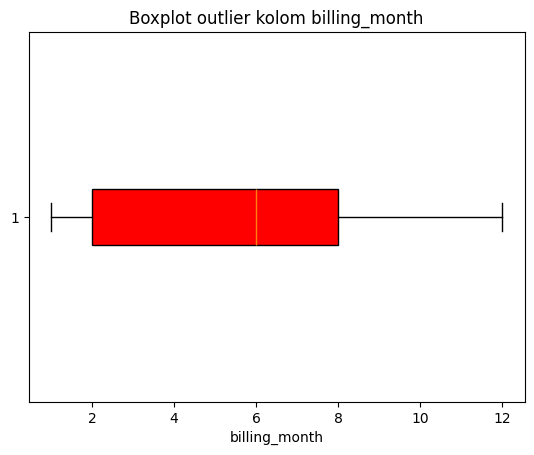

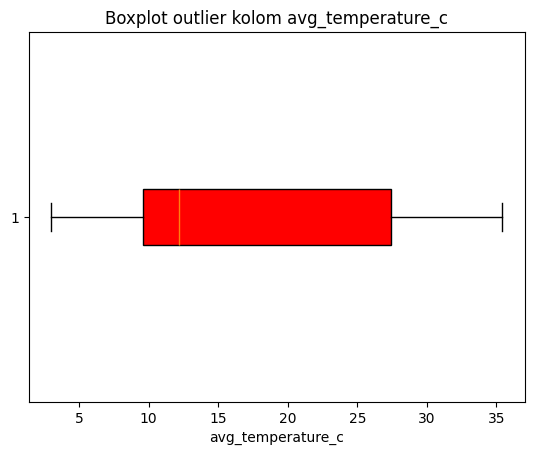

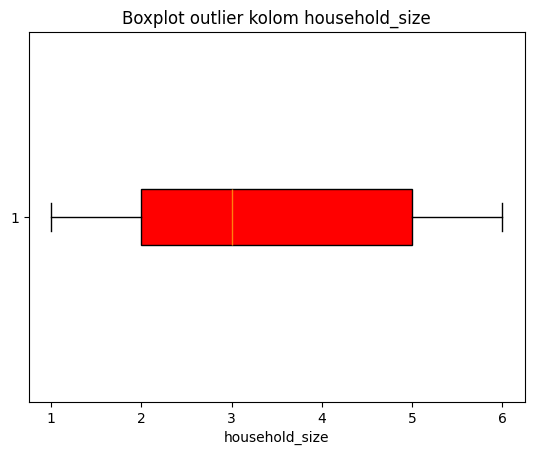

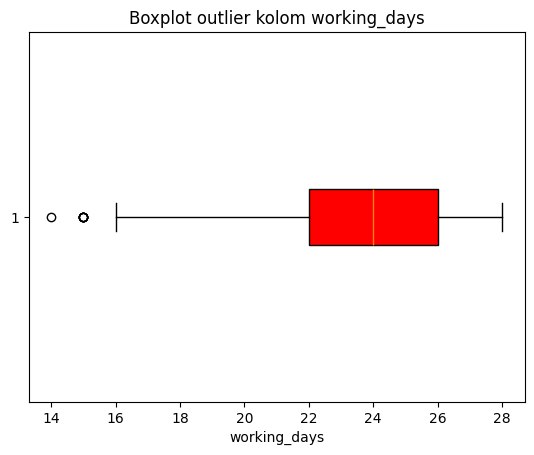

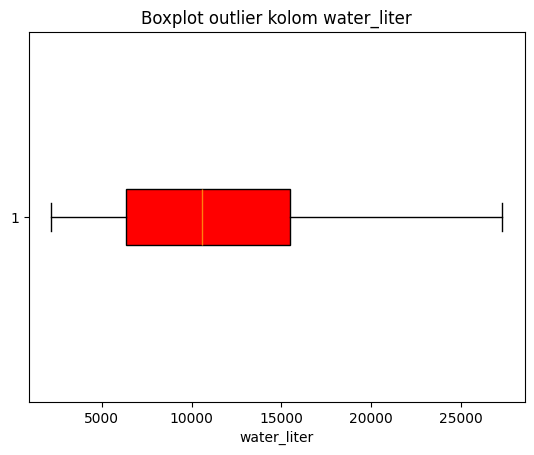

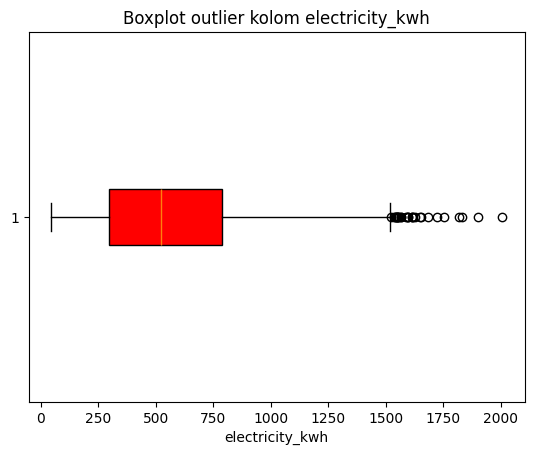

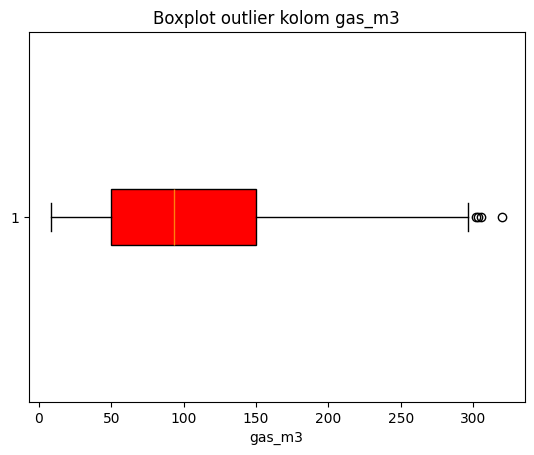

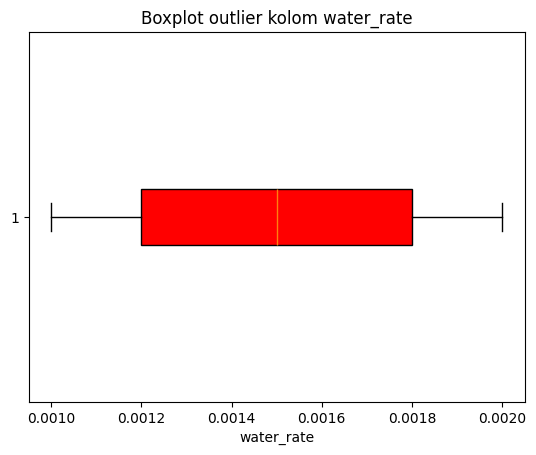

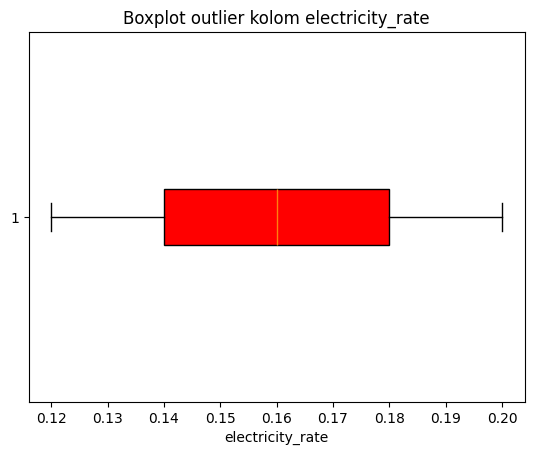

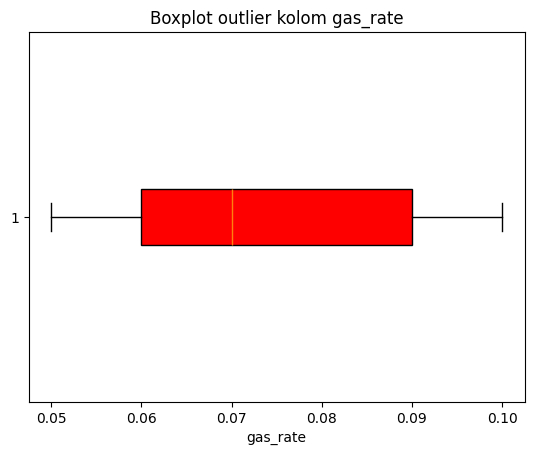

In [ ]:
#VISUALISASI
for kolom in kolom_numerik:
  plt.figure()
  plt.boxplot(data[kolom].dropna(), vert = False, patch_artist = True, boxprops = dict(facecolor="red"))
  plt.title(f"Boxplot outlier kolom {kolom}")
  plt.xlabel(kolom)
  plt.show()

**Cara melakukan pengecekan**

Pengecekan dilakukan dengan menggukana metode IQR (Interquartile Range)
1. Menghitung Q1 dan Q3 dari setiap kolom numerik
2. Menghitung nilai IQR dengan rumus Q3 - Q1
3. Menentukan batas bawah dan batas atas outlier dengan rumus
Batas bawah = Q1 - 1,5 x IQR
Batas atas = Q3 + 1,5 x IQR
4. Data dianggap outlier jika nilainya lebih kecil dari batas bawah atau lebih besar dari batas atas
5. Untuk lebih jelas, kami menampilkan hasil tiap-tiap kolom_numerik dalam bentuk boxplot, dimana titik yang diluar garis dianggap sebagai outlier


**Hasil Deteksi Outlier**

Berdasarkan perhitungan IQR, diperoleh hasil berikut:
1. **Kolom tanpa outlier:**
    *   billing_month
    *   avg_temperature_c
    *   household_size
    *   water_liter
    *   water_rate
    *   electricity_rate
    *   gas_rate

2. **Kolom dengan outlier:**
    *   working_days
   
        Pada kolom working_days ditemukan 7 outlier, dengan nilai terendah di sekitar 14-15 hari kerja per bulan
        Dari boxplot juga terlihat bahwa sebagian besar rumah tangga memiliki jumlah hari kerja di sekitar 20-28 hari, sedangkan nilai 14-15 hari berada jauh di bawah mayoritas data.

    *   electricity_kwh

        Pada kolom working_days ditemukan 29 outlier. Boxplot menunjukkan bahwa sebagian besar rumah tangga menggunakan listrik di bawah 1500 kwh per bulan, sementara outlier berada di atas nilai tersebut, bahkan mencapai lebih dari 1700-2000 kWh.

    *   gas_m3

        Pada kolom gas_m3 ditemukan 4 outlier dengan nilai mendekati atau melebihi 300 m^3. Sebagian besar rumah tangga menggunakan gas di bawah nilai tersebut, sehingga data dengan penggunaan sangat tinggi ini tergolong ekstrem.

### Penanganan Outlier

**Cara Penanganan Outlier**

Secara umum, ada beberapa cara untuk menangani outlier:


1.   **Trimming (menghapus data ekstrem)**
      Digunakan jika outlier berasal dari kesalahan pencatatan atau kesalahan input data.
2.   **Winsorizing**
      Mengganti nilai ekstrem dengan nilai batas atas atau bawah agar tidak terlalu memengaruhi hasil analisis.
3.   **Transformasi data (log/sqrt)**
      Digunakan ketika data sangat miring (skewed), misalnya data konsumsi energi.
4.   **Membiarkan outlier apa adanya (dipertahankan)**
      Jika outlier merupakan fenomena nyata yang relevan dengan konteks data.


**Keputusan dalam Dataset Utility**

Untuk dataset utilitas, outlier pada kolom electricity_kwh, gas_m3, dan working_days **tidak dihapus**, karena kemungkinan besar data tersebut menggambarkan kondisi nyata rumah tangga tertentu yang memang memiliki konsumsi ekstrem atau pola kerja berbeda, dengan menghapus data tentunya dapat menghilangkan informasi penting, dan outlier tidak mengganggu analisis deksriptif.

## Nomor 3
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika kategorikal dengan histogram.

### Kolom billing_month

Pada visualisasi distribusi kolom billing_month, dapat dilihat bahwa data terkonsentrasi pada beberapa kelompok bulan tertentu, yaitu bulan 1-2, 6-8, dan 12. Hal ini berarti bahwa data tagihan paling sering diambil pada bulan-bulan tersebut dan tidak merata. Selain itu, jika dilihat dari bulan-bulan yang sering muncul, itu adalah pada musim tertentu yaitu musim dingin dan musim panas.

Text(0, 0.5, 'Counts')

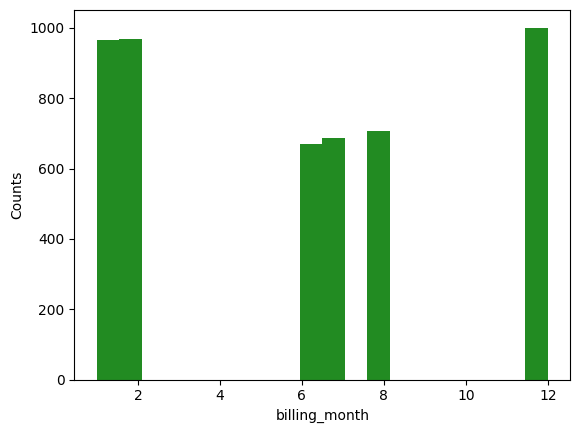

In [ ]:
plt.hist(data["billing_month"], bins = 20, color = 'forestgreen')
plt.xlabel("billing_month")
plt.ylabel("Counts")

### Kolom season

Pada visualisasi distribusi kolom musim di bawah, dapat dilihat bahwa pengambilan data didominasi pada musim dingin dibandingkan pada musim panas

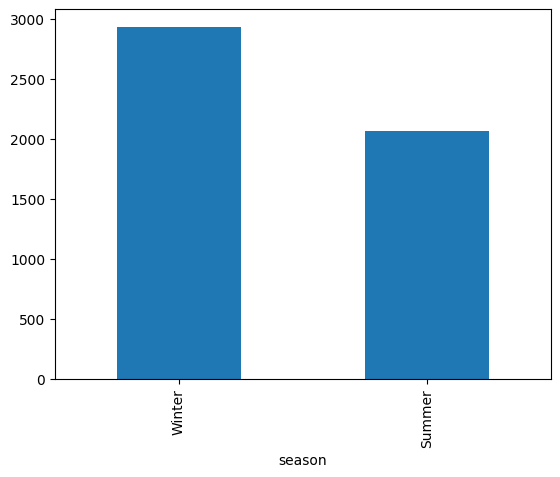

In [ ]:
freq = data["season"].value_counts()
color_map = {
    "Winter": "#lightcyan",
    "Summer": "#1F77B4"
}
freq.plot(kind = 'bar')
plt.show()

### Kolom avg_temperature_c

Pada visualisasi suhu rata-rata, menunjukkan data terkonsentrasi pada dua range yaitu suhu rendah (7-15 Celcius) dan suhu tinggi (25 - 30 Celcius). Suhu rendah mencerminkan data pada musim dingin, sedangkan suhu tinggi mencerminkan data pada musim panas. Hal ini menunjukkan data sesuai dengan data musim yang hanya memiliki kategori "Winter" dan "Summer". Selain itu puncak suhu rendah lebih tinggi dibandingkan puncak suhu tinggi, hal ini juga sesuai dengan jumlah data "Winter" yang lebih banyak dibandingkan data "Summer".

Text(0, 0.5, 'Counts')

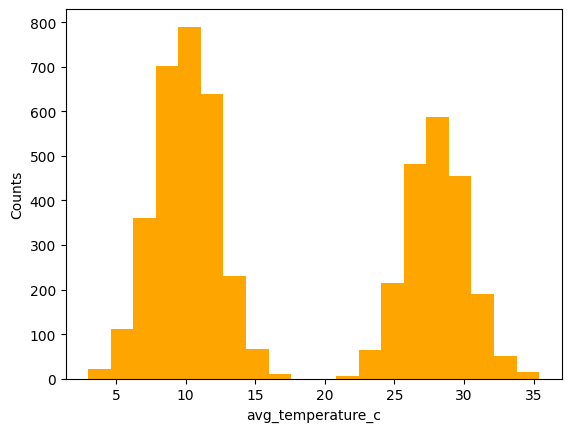

In [ ]:
plt.hist(data["avg_temperature_c"], bins = 20, color = 'orange')
plt.xlabel("avg_temperature_c")
plt.ylabel("Counts")

### Kolom household_size

Berdasarkan visualisasi di bawah, dapat dilihat bahwa frekuensi anggota keluarga relatif seimbang, tidak ada ukuran rumah tangga yang sangat dominan. Hal ini menandakan bahwa pengambilan data jumlah anggota keluarga bervariasi dan representatif. Data ini juga mencerminkan variasi demografis yang umum, tidak didominasi keluarga besar atau kecil.

Text(0, 0.5, 'Counts')

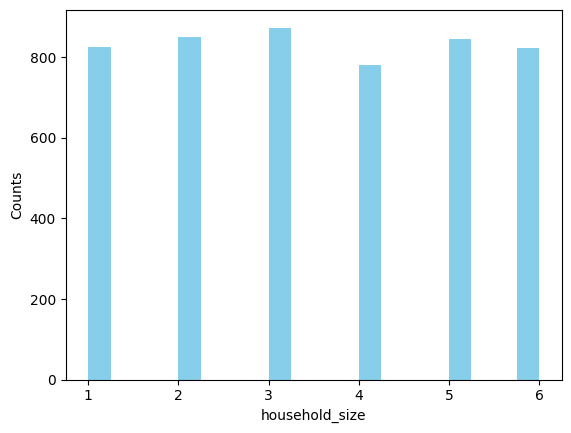

In [ ]:
plt.hist(data["household_size"], bins = 20, color = 'skyblue')
plt.xlabel("household_size")
plt.ylabel("Counts")

### Kolom working_days

Berdasarkan visualisasi di bawah ini, dapat dilihat bahwa sebagian besar waktu kerja terkonsentrasi antara 21 -28 hari. Namun terdapat beberapa outlier yaitu 14 - 16 hari kerja. Hal ini dapat disebabkan karena adanya yang mengambil cuti pada waktu tersebut.

Text(0, 0.5, 'Counts')

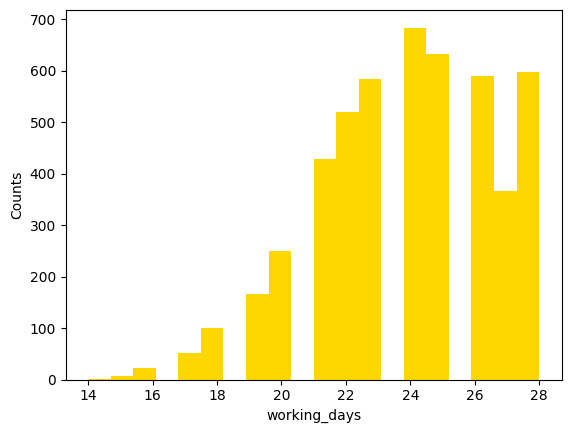

In [ ]:
plt.hist(data["working_days"], bins = 20, color = 'gold')
plt.xlabel("working_days")
plt.ylabel("Counts")

### Kolom ownership_status

Berdasarkan visualisasi bar chart di bawah ini, status kepemilikan terbagi atas dua yaitu disewakan "Rented" dan pemilik sendiri "Owned". Jumlah penghuni yang menyewa lebih banyak dibandingkan dengan yang memiliki kepemilikan sendiri. Hal ini tentu nantinya berdampak pada  pola penggunaan utility nya.

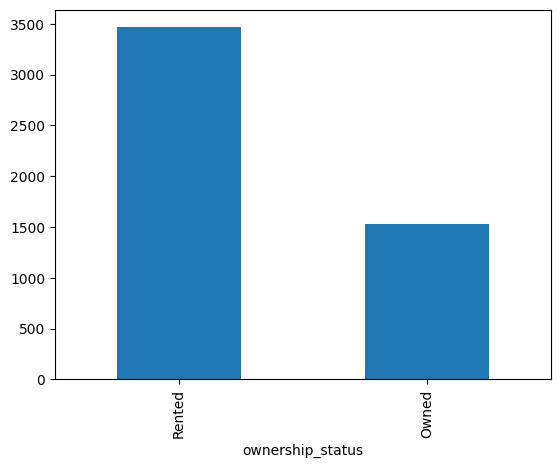

In [ ]:
freq = data["ownership_status"].value_counts()
freq.plot(kind = 'bar')
plt.show()

### Kolom water_liter

Berdasarkan visualisasi di bawah, dapat dilihat bahwa sebagian besar rumah menggunakan air pada range 5000 - 17000 liter. Hal ini menunjukkan penggunaan air pada keluarga yang masih normal. Terdapat juga data terkonsentrasi tinggi padapenggunaan air dibawah 5000 liter. Hal ini menunjukkan bahwa rumah tersebut dihuni oleh 1 orang penghuni saja.

Text(0, 0.5, 'Counts')

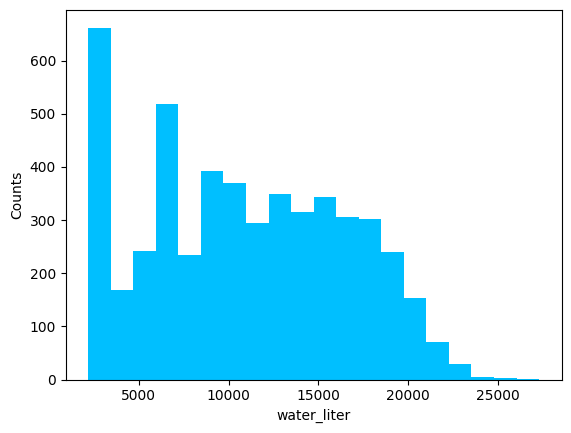

In [ ]:
plt.hist(data["water_liter"], bins = 20, color = 'deepskyblue')
plt.xlabel("water_liter")
plt.ylabel("Counts")

### Kolom electricity_kwh

Melalui visualisasi penggunaak listrik di bawah ini, dapat dilihat bahwa sebagian besar rumah menggunakan listrik di range 200 hingga 800 kwh. Namun sangat sedikit rumah yang menggunakan listrik lebih dari 1500 kwh.

Text(0, 0.5, 'Counts')

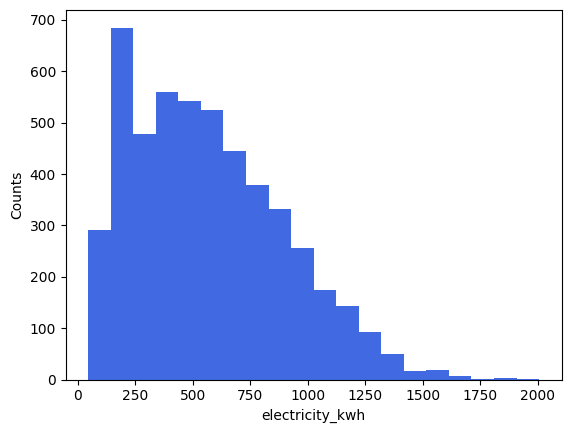

In [ ]:
plt.hist(data["electricity_kwh"], bins = 20, color = 'royalblue')
plt.xlabel("electricity_kwh")
plt.ylabel("Counts")

### Kolom gas_m3

Berdasarkan hasil visualisasi di bawah ini, dapat dilihat penggunaan gas bulanan terbanyak berada di range 40 - 120 m3 dan konsumsi melebihi 250 m3 sangat sedikit.

Text(0, 0.5, 'Counts')

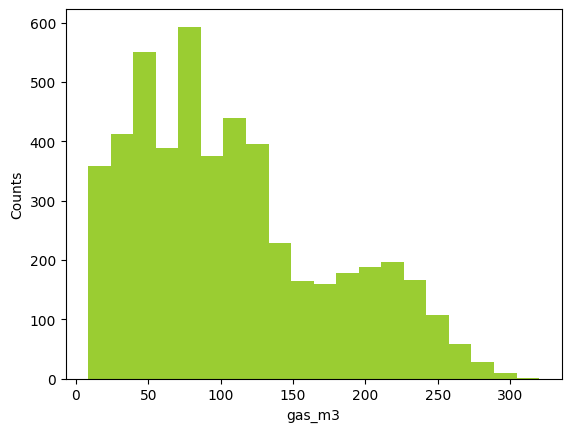

In [ ]:
plt.hist(data["gas_m3"], bins = 20, color = 'yellowgreen')
plt.xlabel("gas_m3")
plt.ylabel("Counts")

### Kolom energy_efficiency_rating

Berdasarkan visualisasi rating efisiensi energi, dapat dilihat Rating B paling banyak muncul, diikuti rating A dan C. Hal ini menunjukkan mayoritas tempat tinggal sudah memiliki efisiensi energi yang cukup bagus. Namun masih ada beberapa memiliki rating E namun sangat sedikit.

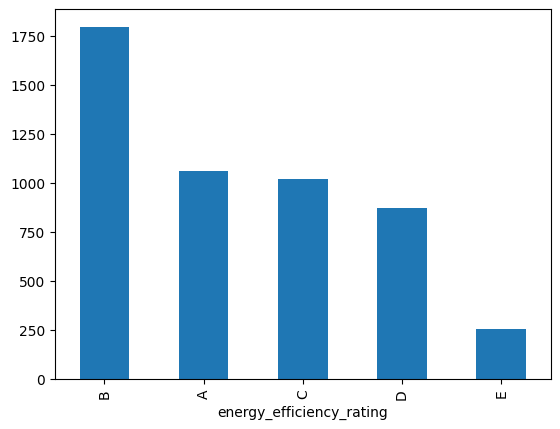

In [ ]:
freq = data["energy_efficiency_rating"].value_counts()
freq.plot(kind = 'bar')
plt.show()

### Kolom water_rate

Dapat dilihat bahwa terdapat beberapa tarif yang muncul berulang (0.0010, 0.0012, 0.0014, 0.0016, 0.0018). Namun terdapat data terkonsentrasi di dua daerah yang membuatnya terlihat seperti bimodal.

Text(0, 0.5, 'Counts')

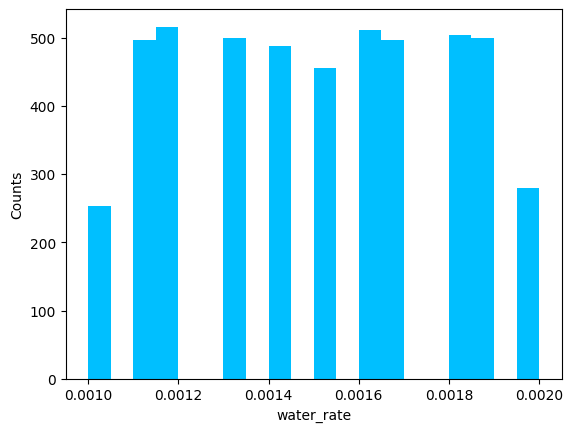

In [ ]:
plt.hist(data["water_rate"], bins = 20, color = 'deepskyblue')
plt.xlabel("water_rate")
plt.ylabel("Counts")

### Kolom electricity_rate

Dapat dilihat bahwa terdapat beberapa tarif yang muncul berulang (0.13, 0.15, 0.16, 0.17, 0.18). Namun terdapat data terkonsentrasi di dua daerah yang membuatnya terlihat seperti bimodal.

Text(0, 0.5, 'Counts')

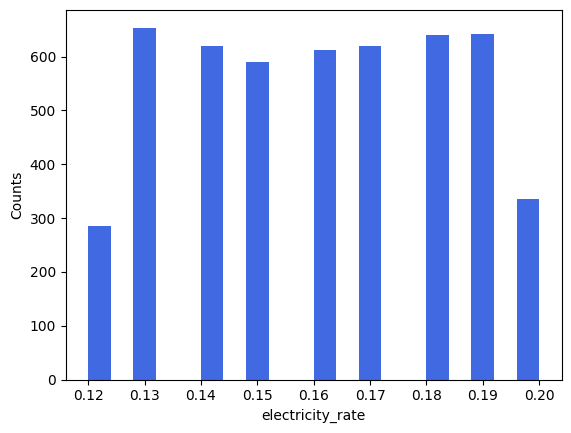

In [ ]:
plt.hist(data["electricity_rate"], bins = 20, color = 'royalblue')
plt.xlabel("electricity_rate")
plt.ylabel("Counts")

### Kolom gas_rate
Dapat dilihat bahwa terdapat beberapa tarif yang muncul berulang (0.06, 0.07, 0.08, 0.09). Namun terdapat data terkonsentrasi di dua daerah yang membuatnya terlihat seperti bimodal.

Text(0, 0.5, 'Counts')

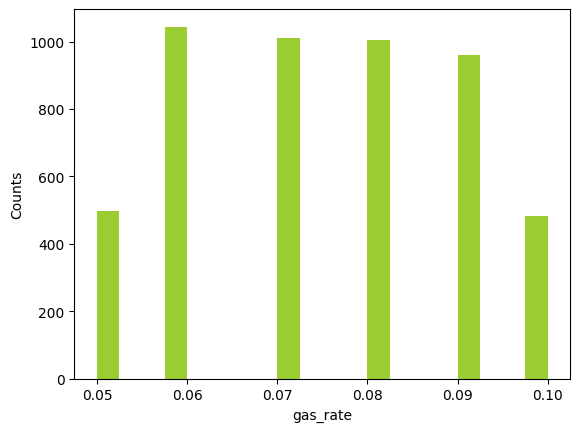

In [ ]:
plt.hist(data["gas_rate"], bins = 20, color = 'yellowgreen')
plt.xlabel("gas_rate")
plt.ylabel("Counts")

## Nomor 4
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

In [ ]:
hasil_statistik_library = {}

for kolom in kolom_numerik:
    seri = data[kolom].dropna()
    if len(seri) < 2:
        continue

    hasil_statistik_library[kolom] = {
        "Skewness": seri.skew(),
        "Kurtosis": seri.kurtosis()
    }

tabel_statistik_library = pd.DataFrame(hasil_statistik_library).T
tabel_statistik_library



,Skewness,Kurtosis
billing_month,0.216258,-1.253718
avg_temperature_c,0.322341,-1.663527
household_size,0.019416,-1.270237
working_days,-0.380176,-0.402747
water_liter,0.147261,-1.048279
electricity_kwh,0.640197,-0.110700
gas_m3,0.681125,-0.488873
water_rate,-0.000390,-1.177402
electricity_rate,-0.013954,-1.160684
gas_rate,0.035429,-1.040815


### 1. Kolom billing_month

**Visual**: terkonsentrasi di beberapa bulan tertentu sehingga tidak kontinu.

**Statistik**: skewness +0.216 (ekor sedikit kanan), kurtosis -1.254 (flat).

Berdasarkan hasil statistik dan visual, dapat dilihat skewness nya kecil karena data tidak terkonsentrasi di sisi kiri/kanan saja tapi lebih ke tersebar di beberapa titik. Sedangkan kurtosis negatif nya menunjukkan distribusi yang flat. (platikurtik)

**Kesimpulan**: Distribusi multimodal homogen

### 2. Kolom avg_temperature_c

**Visual**: ada dua daerah terkonsentrasi pada suhu (rendah dan tinggi) sehingga terlihat dua puncak.

**Statistik**: skewness +0.322 (ekor sedikit kanan), kurtosis -1.664 (sangat flat).

Berdasarkan hasil statistik dan visual, dapat dilihat bahwa distribusi terdapat dua puncak yang disebut bimodal sehingga nilai kurtosis menjadi tidak relevan untuk menunjukkan jenis distribusinya. Namun jika dilihat dari skewness, data lebih terkonsentrasi ke puncak kiri (Positive skew). Selain itu berdasarkan visual kedua puncak terlihat tajam

**Kesimpulan**: Distribusi bimodal positive skew

### 3. household_size

**Visual**: data terkonsentrasi di daerah kanan grafik.

**Statistik**: skewness +0.019416 (hampir simetris), kurtosis -1.270237 (sangat flat).

Berdasarkan hasil statistik dan visual, dapat dilihat bahwa kolom household_size memiliki distribusi terkonsentrasi ke kiri sedikit, dan memiliki distribusi yang datar (platikurtik) karena kurtosis < 0.

**Kesimpulan**: Distribusi platykurtic uniform simetric

### 4. Kolom working_days

**Visual**: data terkonsentrasi di daerah kanan grafik

**Statistik**: skewness -0.380176	(ekor sedikit kiri), kurtosis -0.402747 (agak flat).

Berdasarkan hasil visualisasi dan statistik, dapat dilihat bahwa kolom working_days, terkonsentrasi di daerah kanan dan ekornya memanjang ke kiri dan sesuai dengan nilai skewnya yang negatif. Serta nilai kurtosis dibawah 0 menunjukkan bahwa ditribusi juga tidak normal dan agak sedikit datar (termasuk platikurtik).

**Kesimpulan**: Distribusi platykurtic negative skew

### 5. Kolom water_liter

**Visual**: data terkonsentrasi di daerah kiri grafik dan penyebaran landai.

**Statistik**: skewness +0.147261	(ekor kanan), kurtosis -1.048279 (flat).

Berdasarkan hasil statistik dan visualisasi, data penggunaan air terkonsentrasi di daerah kiri yang sesuai dengan nilai skewness positif, serta penyebarannya yang landai sesuai dengan nilai kurtosis negatif.

**Kesimpulan**: Distribusi platykurtic positive skew

### 6. Kolom electricity_kwh

**Visual**: data terkonsentrasi di daerah kiri grafik dan penyebaran landai.

**Statistik**: skewness +0.640197	(ekor kanan), kurtosis -0.110700 (mendekati mesokurtic).

Berdasarkan hasil statistik dan visualisasi, data penggunaan listrik terkonsentrasi di daerah kiri yang sesuai dengan nilai skewness positif, serta penyebarannya yang sedikit landai sesuai dengan nilai kurtosis negatif.

**Kesimpulan**: Distribusi platykurtic positive skew

### 7. Kolom gas_m3
**Visual**: data terkonsentrasi di daerah kiri grafik.

**Statistik**: skewness +0.681125	(ekor kanan), kurtosis -0.488873 (sedikit flat).

Berdasarkan hasil statistik dan visualisasi, data penggunaan gas terkonsentrasi di daerah kiri yang sesuai dengan nilai skewness positif, serta penyebarannya yang sedikit landai sesuai dengan nilai kurtosis negatif.

**Kesimpulan**: Distribusi platykurtic positive skew

### 8. Kolom water_rate
**Visual**: ada dua daerah data terkonsentrasi sehingga terlihat dua puncak.

**Statistik**: skewness -0.000390	(hampir normal), kurtosis -1.177402 (agak flat).

Berdasarkan hasil statistik dan visual, dapat dilihat bahwa distribusi terdapat dua puncak yang disebut bimodal sehingga terdapat dua nilai modus. Meskipun nilai skewness nya sangat mendekati 0, DIstribusi ini tidak dapat disebut normal karena mengandung lebih dari satu nilai modus.

**Kesimpulan**: Distribusi bimodal

### 9. Kolom electicity_rate
**Visual**: ada dua daerah terkonsentrasi pada suhu (rendah dan tinggi) sehingga terlihat dua puncak.

**Statistik**: skewness -0.013954	(ekor kiri), kurtosis -1.160684 (agak flat).

Berdasarkan hasil statistik dan visual, dapat dilihat bahwa distribusi terdapat dua puncak yang disebut bimodal sehingga terdapat dua nilai modus. Meskipun nilai skewness nya sangat mendekati 0, DIstribusi ini tidak dapat disebut normal karena mengandung lebih dari satu nilai modus.

**Kesimpulan**: Distribusi bimodal

### 10. Kolom gas_rate
**Visual**: ada dua daerah terkonsentrasi pada suhu (rendah dan tinggi) sehingga terlihat dua puncak.

**Statistik**: skewness 0.035429	(ekor kanan), kurtosis -1.040815 (agak flat).

Berdasarkan hasil statistik dan visual, dapat dilihat bahwa distribusi terdapat dua puncak yang disebut bimodal sehingga terdapat dua nilai modus. Meskipun nilai skewness nya sangat mendekati 0, DIstribusi ini tidak dapat disebut normal karena mengandung lebih dari satu nilai modus.

**Kesimpulan**: Distribusi bimodal

# Soal Spesifik Dataset

Enam Langkah Testing:

1.  Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Nomor 5 : Hipotesis 1 Sampel

1. Perserikatan Hewan-hewan (PHH) merekomendasikan agar setiap hewan hanya menggunakan air sebanyak 50-100 liter tiap harinya, atau 1500-3000 liter per bulan. Apakah rata-rata penggunaan air tiap hewan per bulannya pada data kurang dari batas atas rekomendasi, yaitu 3000 liter per bulan? Asumsikan setiap hewan dalam satu rumah tangga menggunakan porsi air yang setara.


2. Didapatkan bahwa pada survey tahun lalu, ditemukan standar deviasi penggunaan listrik rumah tangga adalah 300 kWh. Apakah standar deviasi penggunaan listrik masih sama tahun ini?


3. Tom Nook memberikan target agar setiap rumah tangga memiliki rating efisiensi energi A atau B. Apakah proporsi rumah tangga yang sudah memenuhi target lebih dari 50% populasi? Kemudian apakah proporsi tersebut lebih dari 60% populasi?


4. Survey diusahakan sehingga sampel yang didapatkan memiliki proporsi yang sama untuk data di musim panas dan musim dingin. Apakah proporsi data yang didapatkan setara?


### 5.1
Pertanyaan 1

In [ ]:
# 5.1 Uji rata-rata penggunaan air per hewan < 3000 liter
# --- PERSIAPAN DATA ---
# Membuat kolom baru
data["air_per_hewan"] = data["water_liter"] / data["household_size"]
# Mengambil data yang bersih
sampel_air = data["air_per_hewan"].dropna().tolist()
print("=== DIKETAHUI ===")
# Jumlah sampel
n = len(sampel_air)
print(f"Jumlah sampel (n) = {n}")
# Rata-rata sampel
x_bar = mean(sampel_air)
print(f"Rata-rata penggunaan air per hewan sampel (x_bar) = {x_bar}")
# Variansi sampel
s2 = variansi(sampel_air)
print(f"Variansi sampel (s^2) = {s2}")
# Simpangan baku sampel
s = standar_deviasi(sampel_air)
print(f"Simpangan baku sampel (s) = {s}")
# Rata-rata hipotesis
mu0 = 3000
print(f"Rata-rata hipotesis (μ0) = {mu0}")
# Derajat kebebasan (v)
v = n - 1
print(f"Derajat kebebasan (v) = {v}")

# Ditanya: apakah μ < 3000?
# Jawab:
print("\n=== JAWAB ===")
# 1. Tentukan hipotesis null (H0)
print("1. H0:   μ = 3000 (Rata-rata penggunaan air = 3000)")
# 2. Tentukan hipotesis alternatif (H1)
print("2. H1:   μ < 3000 (Rata-rata penggunaan air < 3000)")
# 3. Tentukan tingkat signifikan α
alpha = 0.05
print(f"3. α = {alpha}")
# 4. Daerah Kritis -> t < -t(α, v) (Uji Sisi Kiri)
t_kritis = t.ppf(alpha, v)
print(f"4. Daerah kritis -> t < {t_kritis}")
# 5. Uji Statistik
t_stat = (x_bar - mu0) / (s / math.sqrt(n))
print(f"5. Nilai t statistik = {t_stat}")
p_value = t.cdf(t_stat, v)
print(f"   p-value = {p_value}")
# 6. Kesimpulan
print("6. Keputusan: ")
if (p_value < alpha):
  print("Tolak H0")
  print("Kesimpulan: Terdapat bukti statistik yang cukup untuk menyatakan rata-rata penggunaan air per hewan kurang dari 3000 liter.")
else:
  print("Gagal Menolak H0")
  print("Kesimpulan: Tidak terdapat bukti statistik yang cukup untuk menyatakan rata-rata penggunaan air per hewan kurang dari 3000 liter.")

=== DIKETAHUI ===
Jumlah sampel (n) = 5000
Rata-rata penggunaan air per hewan sampel (x_bar) = 3142.4242123333333
Variansi sampel (s^2) = 118301.43096018772
Simpangan baku sampel (s) = 343.94975063254185
Rata-rata hipotesis (μ0) = 3000
Derajat kebebasan (v) = 4999

=== JAWAB ===
1. H0:   μ = 3000 (Rata-rata penggunaan air = 3000)
2. H1:   μ < 3000 (Rata-rata penggunaan air < 3000)
3. α = 0.05
4. Daerah kritis -> t < -1.645158498582665
5. Nilai t statistik = 29.28018588786394
   p-value = 1.0
6. Keputusan: 
Gagal Menolak H0
Kesimpulan: Tidak terdapat bukti statistik yang cukup untuk menyatakan rata-rata penggunaan air per hewan kurang dari 3000 liter.


### 5.2
Pertanyaan 2

In [ ]:
# 5.2 Uji standar deviasi penggunaan listrik = 300 kWh
# --- PERSIAPAN DATA ---
sampel_listrik = data["electricity_kwh"].dropna().tolist()
# --- PERHITUNGAN ---
n_listrik = len(sampel_listrik)
sigma0_listrik = 300
df = n_listrik - 1
variansi_listrik = variansi(sampel_listrik)
# Hitung Chi-Square Hitung
chi2_listrik = (df * variansi_listrik) / (sigma0_listrik ** 2)
# Hitung Daerah Kritis
z_kritis = 1.96  # z_(0.975) untuk α = 0.05 dua sisi
batas_bawah = df - z_kritis * math.sqrt(2 * df)  # sekitar χ²_(0.975, df)
batas_atas  = df + z_kritis * math.sqrt(2 * df)  # sekitar χ²_(0.025, df)

print("=== DIKETAHUI ===")
print(f"Jumlah sampel (n)                  = {n_listrik}")
print(f"Variansi sampel (s^2)              = {variansi_listrik}")
print(f"Standar deviasi hipotesis (σ0)     = {sigma0_listrik}")
print(f"Derajat kebebasan (df)             = {df}")
print("\n=== JAWAB ===")
# Langkah 1
print("1. H0:   σ = 300 (Simpangan baku penggunaan listrik adalah 300 kWh)")
# Langkah 2
print("2. H1:   σ ≠ 300 (Simpangan baku penggunaan listrik berbeda dari 300 kWh)")
# Langkah 3
alpha = 0.05
print(f"3. α = {alpha}")
# Langkah 4
print("4. Daerah kritis (Pendekatan Normal):")
print(f"   Tolak H0 jika χ² < {batas_bawah} atau χ² > {batas_atas}")
# Langkah 5
print(f"5. Nilai Chi-Square hitung = {chi2_listrik}")
# Langkah 6
print("6. Keputusan:")
if chi2_listrik < batas_bawah or chi2_listrik > batas_atas:
    print("   Tolak H0")
    print("   Kesimpulan: Simpangan baku penggunaan listrik berbeda signifikan dari 300 kWh.")
else:
    print("   Gagal Menolak H0")
    print("   Kesimpulan: Simpangan baku penggunaan listrik masih konsisten dengan 300 kWh (tidak berbeda signifikan).")

=== DIKETAHUI ===
Jumlah sampel (n)                  = 5000
Variansi sampel (s^2)              = 107928.17393160381
Standar deviasi hipotesis (σ0)     = 300
Derajat kebebasan (df)             = 4999

=== JAWAB ===
1. H0:   σ = 300 (Simpangan baku penggunaan listrik adalah 300 kWh)
2. H1:   σ ≠ 300 (Simpangan baku penggunaan listrik berbeda dari 300 kWh)
3. α = 0.05
4. Daerah kritis (Pendekatan Normal):
   Tolak H0 jika χ² < 4803.019600980098 atau χ² > 5194.980399019902
5. Nilai Chi-Square hitung = 5994.810460934305
6. Keputusan:
   Tolak H0
   Kesimpulan: Simpangan baku penggunaan listrik berbeda signifikan dari 300 kWh.


### 5.3
Pertanyaan 3

In [ ]:
# --- PERSIAPAN DATA ---
# Mengubah data rating menjadi data biner (1 jika A/B, 0 jika lainnya)
rating_AB = [1 if r in ["A", "B"] else 0 for r in data["energy_efficiency_rating"]]
# --- PERHITUNGAN STATISTIK SAMPEL ---
n_AB = len(rating_AB)
p_hat = mean(rating_AB)
s_AB = standar_deviasi(rating_AB)
# Derajat kebebasan
df = n_AB - 1

print("=== DIKETAHUI ===")
print(f"Jumlah sampel (n)                  = {n_AB}")
print(f"Proporsi sampel (p_hat)            = {p_hat}")
print(f"Simpangan baku sampel (s)          = {s_AB}")
print(f"Derajat kebebasan (df)             = {df}")

def print_langkah_uji_proporsi(target_p0, p_hat, s, n, alpha, df):
    # Hitung statistik uji
    t_hitung = (p_hat - target_p0) / (s / math.sqrt(n))
    # Hitung p-value (Right-tailed)
    p_value = 1 - stats.t.cdf(t_hitung, df=df)
    # Hitung nilai kritis (untuk Step 4)
    t_kritis = stats.t.ppf(1 - alpha, df=df)
    print(f"\n-- Pengujian Target Proporsi > {int(target_p0*100)}% --")
    print("=== JAWAB ===")
    # Langkah 1
    print(f"1. H0:   p = {target_p0:.2f} (Proporsi rumah rating A/B adalah {int(target_p0*100)}%)")
    # Langkah 2
    print(f"2. H1:   p > {target_p0:.2f} (Proporsi rumah rating A/B lebih dari {int(target_p0*100)}%)")
    # Langkah 3
    print(f"3. α = {alpha}")
    # Langkah 4
    print(f"4. Daerah kritis (Uji Satu Sisi Kanan):")
    print(f"   Tolak H0 jika t_hitung > {t_kritis}")
    # Langkah 5
    print(f"5. Nilai t statistik = {t_hitung}")
    print(f"   p-value           = {p_value}")
    # Langkah 6
    print("6. Keputusan:")
    if p_value < alpha:
        print("   Tolak H0")
        print(f"   Interpretasi: Terdapat bukti statistik bahwa proporsi rumah dengan rating A/B lebih dari {int(target_p0*100)}%.")
    else:
        print("   Gagal Menolak H0")
        print(f"   Interpretasi: Belum ada bukti cukup bahwa proporsi rumah dengan rating A/B lebih dari {int(target_p0*100)}%.")
# --- EKSEKUSI PENGUJIAN ---
alpha = 0.05
# Uji 5.3(a): p > 0.50
print_langkah_uji_proporsi(0.50, p_hat, s_AB, n_AB, alpha, df)
# Uji 5.3(b): p > 0.60
print_langkah_uji_proporsi(0.60, p_hat, s_AB, n_AB, alpha, df)

=== DIKETAHUI ===
Jumlah sampel (n)                  = 5000
Proporsi sampel (p_hat)            = 0.571
Simpangan baku sampel (s)          = 0.49498282960151263
Derajat kebebasan (df)             = 4999

-- Pengujian Target Proporsi > 50% --
=== JAWAB ===
1. H0:   p = 0.50 (Proporsi rumah rating A/B adalah 50%)
2. H1:   p > 0.50 (Proporsi rumah rating A/B lebih dari 50%)
3. α = 0.05
4. Daerah kritis (Uji Satu Sisi Kanan):
   Tolak H0 jika t_hitung > 1.6451584985826644
5. Nilai t statistik = 10.142691516120303
   p-value           = 0.0
6. Keputusan:
   Tolak H0
   Interpretasi: Terdapat bukti statistik bahwa proporsi rumah dengan rating A/B lebih dari 50%.

-- Pengujian Target Proporsi > 60% --
=== JAWAB ===
1. H0:   p = 0.60 (Proporsi rumah rating A/B adalah 60%)
2. H1:   p > 0.60 (Proporsi rumah rating A/B lebih dari 60%)
3. α = 0.05
4. Daerah kritis (Uji Satu Sisi Kanan):
   Tolak H0 jika t_hitung > 1.6451584985826644
5. Nilai t statistik = -4.1427894924998485
   p-value           = 

### 5.4
Pertanyaan 4

In [ ]:
# 5.4 Uji Proporsi Data Winter = 50%
# --- PERSIAPAN DATA ---
# Ubah data season menjadi variabel biner: 1 jika "Winter", 0 jika lainnya
musim_winter = [1 if s == "Winter" else 0 for s in data["season"]]

# --- PERHITUNGAN ---
n_musim = len(musim_winter)
p_hat_winter = mean(musim_winter)
s_musim = standar_deviasi(musim_winter)
p0_musim = 0.5
alpha = 0.05
df = n_musim - 1

print("=== DIKETAHUI ===")
print(f"Jumlah sampel (n)                  = {n_musim}")
print(f"Proporsi sampel Winter (p_hat)     = {p_hat_winter}")
print(f"Simpangan baku sampel (s)          = {s_musim}")
print(f"Proporsi Hipotesis (p0)            = {p0_musim}")

print("\n=== JAWAB ===")
# Langkah 1
print("1. H0:   p = 0.5 (Proporsi data Winter = 50%)")
# Langkah 2
print("2. H1:   p ≠ 0.5 (Proporsi data Winter ≠ 50%)")
print("   -> Uji dua sisi (two-tailed)")
# Langkah 3
print(f"3. α = {alpha}")
# Langkah 4
# Menentukan daerah kritis dua sisi
t_kritis_bawah = stats.t.ppf(alpha/2, df)
t_kritis_atas = stats.t.ppf(1 - alpha/2, df)
print(f"4. Daerah kritis (Uji Dua Sisi):")
print(f"   Tolak H0 jika t_hitung < {t_kritis_bawah} atau t_hitung > {t_kritis_atas}")
print(f"   (atau tolak H0 jika p-value < {alpha})")
# Langkah 5
# Hitung t-statistik
t_musim = (p_hat_winter - p0_musim) / (s_musim / math.sqrt(n_musim))
# Hitung p-value dua sisi
cdf_t = stats.t.cdf(t_musim, df=df)
p_value_musim = 2 * min(cdf_t, 1 - cdf_t)
print(f"5. Nilai t statistik = {t_musim}")
print(f"   p-value           = {p_value_musim}")
# Langkah 6
print("6. Keputusan:")
if p_value_musim < alpha:
    print("   Tolak H0")
    print("   Interpretasi: Proporsi data Winter TIDAK sama dengan 50% (berbeda signifikan).")
else:
    print("   Gagal Menolak H0")
    print("   Interpretasi: Proporsi data Winter masih konsisten dengan 50% (tidak berbeda signifikan).")

=== DIKETAHUI ===
Jumlah sampel (n)                  = 5000
Proporsi sampel Winter (p_hat)     = 0.587
Simpangan baku sampel (s)          = 0.49242207088957723
Proporsi Hipotesis (p0)            = 0.5

=== JAWAB ===
1. H0:   p = 0.5 (Proporsi data Winter = 50%)
2. H1:   p ≠ 0.5 (Proporsi data Winter ≠ 50%)
   -> Uji dua sisi (two-tailed)
3. α = 0.05
4. Daerah kritis (Uji Dua Sisi):
   Tolak H0 jika t_hitung < -1.9604386466615247 atau t_hitung > 1.9604386466615242
   (atau tolak H0 jika p-value < 0.05)
5. Nilai t statistik = 12.493000131390279
   p-value           = 0.0
6. Keputusan:
   Tolak H0
   Interpretasi: Proporsi data Winter TIDAK sama dengan 50% (berbeda signifikan).


## Nomor 6 : Hipotesis 2 Sampel
1. Terdapat dua jenis status kepemilikan tempat tinggal pada sampel yang didapatkan; rumah tangga dapat tinggal di tempat yang disewa atau sudah dimiliki. Tom Nook berprasangka bahwa para penyewa akan lebih konservatif dalam menggunakan air. Apakah terdapat perbedaan rata-rata penggunaan air antara dua kelompok tersebut?
2. Apakah rata-rata biaya yang dikeluarkan untuk utilitas rumah tangga lebih tinggi pada musim dingin?
3. Dibutuhkan perbandingan antara tempat tinggal yang memiliki rating A dan D untuk efisiensi energi. Apakah rating A berarti rumah tangga mengeluarkan biaya yang lebih kecil dari rumah tangga rating D secara rata-rata?
4. Telah didapatkan bukti bahwa penggunaan gas lebih tinggi pada musim dingin. Hal ini mungkin dikarenakan kebutuhan pemanas rumah. Tetapi beberapa rumah tangga mulai menggunakan pemanas elektrik. Uji apakah variansi penggunaan gas lebih tinggi di musim dingin daripada di musim panas!

### 6.1

Terdapat dua jenis status kepemilikan tempat tinggal pada sampel yang didapatkan; rumah tangga dapat tinggal di tempat yang disewa atau sudah dimiliki. Tom Nook berprasangka bahwa para penyewa akan lebih konservatif dalam menggunakan air. Apakah terdapat perbedaan rata-rata penggunaan air antara dua kelompok tersebut?

In [ ]:
# Diketahui:
# Jumlah rumah tangga tinggal di tempat sewa (penyewa)
print("=== DIKETAHUI ===")
n1 = (data["ownership_status"]=="Rented").sum()
print(f"Jumlah rumah yang disewakan (n1) = {n1}")
# Jumlah rumah tangga tinggal di tempat sendiri (owned)
n2 = (data["ownership_status"]=="Owned").sum()
print(f"Jumlah rumah yang dimiliki pribadi (n2) = {n2}")

# Rata-rata penggunaan air oleh penyewa
x1 = mean(data.loc[data["ownership_status"] == "Rented", "water_liter"])
print(f"Rata-rata penggunaan air oleh penyewa (x_bar1) = {x1}" )
# Rata-rata penggunaan air oleh owned
x2 = mean(data.loc[data["ownership_status"] == "Owned", "water_liter"])
print(f"Rata-rata penggunaan air oleh pemilik rumah pribadi (x_bar2)= {x2}")

# Variansi penggunaan air oleh penyewa
s2_1 = variansi(data.loc[data["ownership_status"] == "Rented", "water_liter"])
print(f"Variansi penggunaan air oleh pemilik penyewa = {s2_1}")
# Variansi penggunaan air oleh owned
s2_2 = variansi(data.loc[data["ownership_status"] == "Owned", "water_liter"])
print(f"Variansi penggunaan air oleh pemilik rumah pribadi = {s2_2}")

# σ1 dan σ2 tidak diketahui
print("Simpangan baku populasi kedua sampel tidak diketahui")

# Derajat kebebasan (v)
v = ( ( (s2_1/n1) + (s2_2/n2) )**2 ) / ( ( (s2_1/n1)**2 / (n1-1) ) + ( (s2_2/n2)**2 / (n2-1) ) )
print(f"Derajat kebebasan (v) = {v}")

# Ditanya: apakah μ1<μ2?
# Jawab:
print("=== JAWAB ===")
# 1. Tentukan hipotesis null (H0)
# H0:    μ1-μ2 = 0
print("1. H0:   μ1-μ2 = 0 ")
# 2. Tentukan hipotesis alternatif (H1)
# H1:    μ1-μ2 < 0
print("2. H1:    μ1-μ2 < 0 ")
# 3. Tentukan tingkat signifikan α
# α = 0.05
alpha = 0.05
print(f"3. α = 0.05")
# 4. Daerah Kritis -> t < -t(α) -> t < -t(0.05, v)
t_kritis = t.ppf(alpha, v)
print(f"4. Daerah kritis -> t < {t_kritis}")
# 5. Uji Statistik
t_stat = (x1-x2)/ math.sqrt((s2_1/n1)+(s2_2/n2))
print(f"5. Nilai t statistik = {t_stat}")
p_value = t.cdf(t_stat, v)
print(f"   p-value = {p_value}")
# 6. Kesimpulan
print("6. Keputusan: ")
if (p_value < alpha):  # atau t_stat < t_kritis
  print("Tolak H0")
  print("Kesimpulan: Terdapat bukti statistik yang cukup untuk mendukung dugaan Tom Nook bahwa penyewa menggunakan air lebih sedikit dibandingkan pemilik tempat tinggal secara rata-rata")
else:
  print("Gagal Menolak H0")
  print("Kesimpulan: Tidak terdapat bukti statistik yang cukup untuk mendukung dugaan Tom Nook bahwa penyewa menggunakan air lebih sedikit dibandingkan pemilik tempat tinggal secara rata-rata")


=== DIKETAHUI ===
Jumlah rumah yang disewakan (n1) = 3465
Jumlah rumah yang dimiliki pribadi (n2) = 1535
Rata-rata penggunaan air oleh penyewa (x_bar1) = 10678.461500721502
Rata-rata penggunaan air oleh pemilik rumah pribadi (x_bar2)= 11570.839283387622
Variansi penggunaan air oleh pemilik penyewa = 28821887.195359178
Variansi penggunaan air oleh pemilik rumah pribadi = 32973879.115333255
Simpangan baku populasi kedua sampel tidak diketahui
Derajat kebebasan (v) = 2768.1913316632017
=== JAWAB ===
1. H0:   μ1-μ2 = 0 
2. H1:    μ1-μ2 < 0 
3. α = 0.05
4. Daerah kritis -> t < -1.6454042689183372
5. Nilai t statistik = -5.169461258075983
   p-value = 1.25747439929837e-07
6. Keputusan: 
Tolak H0
Kesimpulan: Terdapat bukti statistik yang cukup untuk mendukung dugaan Tom Nook bahwa penyewa menggunakan air lebih sedikit dibandingkan pemilik tempat tinggal secara rata-rata


### 6.2
Apakah rata-rata biaya yang dikeluarkan untuk utilitas rumah tangga lebih tinggi pada musim dingin?

In [ ]:
# Diketahui:
# Jumlah terjadinya musim dingin
print("=== DIKETAHUI ===")
n1 = (data["season"]=="Winter").sum()
print(f"Jumlah data yang diambil pada musim dingin (n1) = {n1}")
# Jumlah terjadinya musim panas
n2 = len(data["season"]) - n1
print(f"Jumlah data yang diambil pada musim panas (n2) = {n2}")

# Biaya = water_liter * water_rate + electricity_kwh * electricity_rate + gas_m3 * gas_rate
data["total_utility_cost"] = (
    data["water_liter"] * data["water_rate"] +
    data["electricity_kwh"] * data["electricity_rate"] +
    data["gas_m3"] * data["gas_rate"]
)
# Rata-rata penggunaan utility pada musim dingin
x1 = mean(data.loc[data["season"] == "Winter", "total_utility_cost"])
print(f"Rata-rata penggunaan utility pada musim dingin (x1) = {x1}")
# Rata-rata penggunaan utility pada musim panas
x2 = mean(data.loc[data["season"] == "Summer", "total_utility_cost"])
print(f"Rata-rata penggunaan utility pada musim panas (x2) = {x2}")

# Variansi penggunaan utility pada musim dingin
s2_1 = variansi(data.loc[data["season"] == "Winter", "total_utility_cost"])
print(f"Variansi penggunaan utility pada musim dingin (s2_1) = {s2_1}")
# Variansi penggunaan utility pada musim panas
s2_2 = variansi(data.loc[data["season"] == "Summer", "total_utility_cost"])
print(f"Variansi penggunaan utility pada musim panas (s2_2) = {s2_2}")

# σ1 dan σ2 tidak diketahui
print("Simpangan baku populasi kedua sampel tidak diketahui")

# Derajat kebebasan (v)
v = ( ( (s2_1/n1) + (s2_2/n2) )**2 ) / ( ( (s2_1/n1)**2 / (n1-1) ) + ( (s2_2/n2)**2 / (n2-1) ) )
print(f"Derajat kebebasan (v) = {v}")

# Ditanya: apakah μ1>μ2?
# Jawab:
print("=== JAWAB ===")
# 1. Tentukan hipotesis null (H0)
# H0:    μ1-μ2 = 0
print("1. H0:   μ1-μ2 = 0 ")
# 2. Tentukan hipotesis alternatif (H1)
# H1:    μ1-μ2 > 0
print("2. H1:   μ1-μ2 > 0 ")
# 3. Tentukan tingkat signifikan α
# α = 0.05
alpha = 0.05
print("3. α = 0.05")
# 4. Daerah Kritis -> t > t(α) -> t > t(1-0.05, v)
t_kritis = t.ppf(1-alpha, v)
print(f"4. Daerah kritis -> t > {t_kritis}")
# 5. Uji Statistik
t_stat = (x1-x2)/ math.sqrt((s2_1/n1)+(s2_2/n2))
print(f"5. Nilai t statistik = {t_stat}")
p_value = 1 - t.cdf(t_stat, v)
print(f"   p-value = {p_value}")
# 6. Kesimpulan
print("6. Keputusan: ")
if (p_value < alpha):  # atau t_stat > t_kritis
  print("Tolak H0")
  print("Kesimpulan: Terdapat bukti statistik yang cukup untuk mendukung pendapat rata-rata biaya yang dikeluarkan untuk utilitas rumah tangga lebih tinggi pada musim dingin")
else:
  print("Gagal Menolak H0")
  print("Kesimpulan: Tidak terdapat bukti statistik yang cukup untuk mendukung pendapat rata-rata biaya yang dikeluarkan untuk utilitas rumah tangga lebih tinggi pada musim dingin")


=== DIKETAHUI ===
Jumlah data yang diambil pada musim dingin (n1) = 2935
Jumlah data yang diambil pada musim panas (n2) = 2065
Rata-rata penggunaan utility pada musim dingin (x1) = 113.67098389778535
Rata-rata penggunaan utility pada musim panas (x2) = 119.1663982905569
Variansi penggunaan utility pada musim dingin (s2_1) = 4024.34661468993
Variansi penggunaan utility pada musim panas (s2_2) = 4539.704060455319
Simpangan baku populasi kedua sampel tidak diketahui
Derajat kebebasan (v) = 4272.394386655217
=== JAWAB ===
1. H0:   μ1-μ2 = 0 
2. H1:   μ1-μ2 > 0 
3. α = 0.05
4. Daerah kritis -> t > 1.6452103593776788
5. Nilai t statistik = -2.9086604903249564
   p-value = 0.9981757372806417
6. Keputusan: 
Gagal Menolak H0
Kesimpulan: Tidak terdapat bukti statistik yang cukup untuk mendukung pendapat rata-rata biaya yang dikeluarkan untuk utilitas rumah tangga lebih tinggi pada musim dingin


### 6.3
Dibutuhkan perbandingan antara tempat tinggal yang memiliki rating A dan D untuk efisiensi energi. Apakah rating A berarti rumah tangga mengeluarkan biaya yang lebih kecil dari rumah tangga rating D secara rata-rata?

In [ ]:
# Diketahui:
# Jumlah rumah tangga dengan efisiensi rating A
print("=== DIKETAHUI ===")
n1 = (data["energy_efficiency_rating"]=="A").sum()
print(f"Jumlah rumah tangga dengan efisiensi rating A (n1) = {n1}")
# Jumlah rumah tangga dengan efisiensi rating D
n2 = (data["energy_efficiency_rating"]=="D").sum()
print(f"Jumlah rumah tangga dengan efisiensi rating D (n2) = {n2}")

# Biaya = water_liter * water_rate + electricity_kwh * electricity_rate + gas_m3 * gas_rate
data["total_utility_cost"] = (
    data["water_liter"] * data["water_rate"] +
    data["electricity_kwh"] * data["electricity_rate"] +
    data["gas_m3"] * data["gas_rate"]
)
# Rata-rata biaya rumah tangga dengan efisiensi rating A
x1 = mean(data.loc[data["energy_efficiency_rating"]=="A", "total_utility_cost"])
print(f"Rata-rata biaya rumah tangga dengan efisiensi rating A (x1) = {x1}")
# Rata-rata biaya rumah tangga dengan efisiensi rating D
x2 = mean(data.loc[data["energy_efficiency_rating"]=="D", "total_utility_cost"])
print(f"Rata-rata biaya rumah tangga dengan efisiensi rating D (x2) = {x2}")

# Variansi biaya rumah tangga dengan efisiensi rating A
s2_1 = variansi(data.loc[data["energy_efficiency_rating"]=="A", "total_utility_cost"])
print(f"Variansi biaya rumah tangga dengan efisiensi rating A (s2_1) = {s2_1}")
# Variansi biaya rumah tangga dengan efisiensi rating D
s2_2 = variansi(data.loc[data["energy_efficiency_rating"]=="D", "total_utility_cost"])
print(f"Variansi biaya rumah tangga dengan efisiensi rating D (s2_2) = {s2_2}")

# σ1 dan σ2 tidak diketahui
print("Simpangan baku populasi kedua sampel tidak diketahui")

# Derajat kebebasan (v)
v = ( ( (s2_1/n1) + (s2_2/n2) )**2 ) / ( ( (s2_1/n1)**2 / (n1-1) ) + ( (s2_2/n2)**2 / (n2-1) ) )
print(f"Derajat kebebasan (v) = {v}")

# Ditanya: apakah μ1<μ2?
# Jawab:
print("=== JAWAB ===")
# 1. Tentukan hipotesis null (H0)
# H0:    μ1-μ2 = 0
print("1. H0:    μ1-μ2 = 0")
# 2. Tentukan hipotesis alternatif (H1)
# H1:    μ1-μ2 < 0
print("2. H1:    μ1-μ2 < 0")
# 3. Tentukan tingkat signifikan α
# α = 0.05
alpha = 0.05
print("3. α = 0.05")
# 4. Daerah Kritis -> t < t(α) -> t < t(0.05, v)
t_kritis = t.ppf(alpha, v)
print(f"4. Daerah kritis -> t < {t_kritis}")
# 5. Uji Statistik
t_stat = (x1-x2)/ math.sqrt((s2_1/n1)+(s2_2/n2))
print(f"5. Nilai t statistik = {t_stat}")
p_value = t.cdf(t_stat, v)
print(f"   p-value = {p_value}")
# 6. Kesimpulan
print("6. Keputusan")
if (p_value < alpha):  # atau t_stat < t_kritis
  print("Tolak H0")
  print("Kesimpulan: Terdapat bukti statistik yang cukup untuk mendukung pendapat rumah dengan rating A berarti rumah tangga mengeluarkan biaya yang lebih kecil dari rumah tangga rating D secara rata-rata")
else:
  print("Gagal Menolak H0")
  print("Kesimpulan: Tidak terdapat bukti statistik yang cukup untuk mendukung pendapat rumah dengan rating A berarti rumah tangga mengeluarkan biaya yang lebih kecil dari rumah tangga rating D secara rata-rata")


=== DIKETAHUI ===
Jumlah rumah tangga dengan efisiensi rating A (n1) = 1060
Jumlah rumah tangga dengan efisiensi rating D (n2) = 873
Rata-rata biaya rumah tangga dengan efisiensi rating A (x1) = 101.13360960377359
Rata-rata biaya rumah tangga dengan efisiensi rating D (x2) = 132.09632810996564
Variansi biaya rumah tangga dengan efisiensi rating A (s2_1) = 2927.6785829497526
Variansi biaya rumah tangga dengan efisiensi rating D (s2_2) = 5023.113451509888
Simpangan baku populasi kedua sampel tidak diketahui
Derajat kebebasan (v) = 1605.4713243755723
=== JAWAB ===
1. H0:    μ1-μ2 = 0
2. H1:    μ1-μ2 < 0
3. α = 0.05
4. Daerah kritis -> t < -1.6458032883423688
5. Nilai t statistik = -10.610259581147536
   p-value = 9.102532479219247e-26
6. Keputusan
Tolak H0
Kesimpulan: Terdapat bukti statistik yang cukup untuk mendukung pendapat rumah dengan rating A berarti rumah tangga mengeluarkan biaya yang lebih kecil dari rumah tangga rating D secara rata-rata


### 6.4
Telah didapatkan bukti bahwa penggunaan gas lebih tinggi pada musim dingin. Hal ini mungkin dikarenakan kebutuhan pemanas rumah. Tetapi beberapa rumah tangga mulai menggunakan pemanas elektrik. Uji apakah variansi penggunaan gas lebih tinggi di musim dingin daripada di musim panas!

In [ ]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.
# Diketahui:
print("=== DIKETAHUI ===")
# Jumlah penggunaan gas musim dingin
n1 = (data["season"]=="Winter").sum()
print(f"Jumlah penggunaan gas musim dingin (n1) = {n1}")
# Jumlah penggunaan gas musim panas
n2 = len(data["season"]) - n1
print(f"Jumlah penggunaan gas musim panas (n2) = {n2}")

# Rata-rata penggunaan gas pada musim dingin
x1 = mean(data.loc[data["season"] == "Winter", "gas_m3"])
print(f"Rata-rata penggunaan gas musim dingin (x1) = {x1}")
# Rata-rata penggunaan gas pada musim panas
x2 = mean(data.loc[data["season"] == "Summer", "gas_m3"])
print(f"Rata-rata penggunaan gas musim panas (x2) = {x2}")

# Variansi penggunaan gas pada musim dingin
s2_1 = variansi(data.loc[data["season"] == "Winter", "gas_m3"])
print(f"Variansi penggunaan gas musim dingin (s2_1) = {s2_1}")
# Variansi penggunaan gas pada musim panas
s2_2 = variansi(data.loc[data["season"] == "Summer", "gas_m3"])
print(f"Variansi penggunaan gas musim panas (s2_2) = {s2_2}")

# Derajat kebebasan (v)
v1 = n1 - 1
v2 = n2 -1
print(f"Derajat kebebasan 1 (v1) = {v1}")
print(f"Derajat kebebasan 2 (v2) = {v2}")

# Ditanya: apakah  σ1>σ2?
# Jawab:
print("=== JAWAB ===")
# 1. Tentukan hipotesis null (H0)
# H0:    σ1 = σ2
print("1. H0:    σ1 = σ2")
# 2. Tentukan hipotesis alternatif (H1)
# H1:     σ1 > σ2
print("2. H1:    σ1 > σ2")
# 3. Tentukan tingkat signifikan α
# α = 0.05
alpha = 0.05
print("3. α = 0.05")
# 4. Daerah Kritis -> f > f(1-α, v1, v2)
f_kritis = f.ppf(1 - alpha, v1, v2)
print(f"4. Daerah kritis -> f > {f_kritis}")
# 5. Uji Statistik
f_stat = s2_1/s2_2
print(f"5. Nilai f statistik = {f_stat}")
p_value = 1 - f.cdf(f_stat, v1, v2)
print(f"   p-value = {p_value}")
# 6. Kesimpulan
if (p_value < alpha):   # atau f_stat > f_kritis
  print("Tolak H0")
  print("Kesimpulan: Terdapat bukti statistik yang cukup untuk mendukung pendapat variansi penggunaan gas lebih tinggi di musim dingin daripada di musim panas")
else:
  print("Gagal Menolak H0")
  print("Kesimpulan: Tidak terdapat bukti statistik yang cukup untuk mendukung pendapat variansi penggunaan gas lebih tinggi di musim dingin daripada di musim panas")


=== DIKETAHUI ===
Jumlah penggunaan gas musim dingin (n1) = 2935
Jumlah penggunaan gas musim panas (n2) = 2065
Rata-rata penggunaan gas musim dingin (x1) = 135.3868109028961
Rata-rata penggunaan gas musim panas (x2) = 70.66948184019371
Variansi penggunaan gas musim dingin (s2_1) = 5136.459582532397
Variansi penggunaan gas musim panas (s2_2) = 1259.3871537526982
Derajat kebebasan 1 (v1) = 2934
Derajat kebebasan 2 (v2) = 2064
=== JAWAB ===
1. H0:    σ1 = σ2
2. H1:    σ1 > σ2
3. α = 0.05
4. Daerah kritis -> f > 1.0693664720833553
5. Nilai f statistik = 4.078538968121813
   p-value = 1.1102230246251565e-16
Tolak H0
Kesimpulan: Terdapat bukti statistik yang cukup untuk mendukung pendapat variansi penggunaan gas lebih tinggi di musim dingin daripada di musim panas
